# Unet_Train

Training a UNET with basic paramters:

* input_h,iput_w = 450,450
* classes = 2
* targets = train_y, eval_y


In [1]:
import keras
import sys
import matplotlib
import numpy as np
import time
import matplotlib.pyplot as plt
import os

sys.path.append('../')

from datasets import CD_Dataset
from models import Unet, MimoNet
from utility import show_batches, from_categorical, train, crop_receptive, predict_full_image
from utility import dice, precision, Pc
from datasets import combine_y_w

seed = int((time.time()*1e6)%1e6)
np.random.seed(seed)
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=seed)

Using TensorFlow backend.


In [2]:
input_patch_size = [450,450] # input patch (expect output to be smaller)
input_channels = [3] # RGB
output_channels = [2] #cell and bkg
NBATCH = 5 # example patch per batch
EPCS = 300 # epochs
REG = True # regularization
USEW = True # use weights
W = 10 # importance of weights
NAME_NET = 'Unet_W100' # name for saving
JT = True # Just train set means no evaluation during training 

trained_models_path = './trained_models'
NAME_NET = os.path.join(trained_models_path,NAME_NET)

In [4]:
# Load the dataset
dataset_path = '../CD_Dataset'
dataset = CD_Dataset( path=dataset_path, 
                     train_y_path="train_y",  
                     eval_y_path="eval_y", 
                     fit=True, 
                     download=True, 
                     num_classes=output_channels[0] )


('mean_features: ', array([ 0.86503507,  0.83272585,  0.72929356]))
('std_features: ', array([ 0.01255889,  0.01785996,  0.05625756]))


In [7]:
# define your model
model_input_size = input_patch_size + input_channels
unet = Unet(model_input_size, classes=output_channels[0], regularized=REG)
model_output_size = list(unet.outputs_shape[0])
print("input size: {}\noutput_size: {}".format(model_input_size,model_output_size))

input size: [450, 450, 3]
output_size: [260, 260, 2]


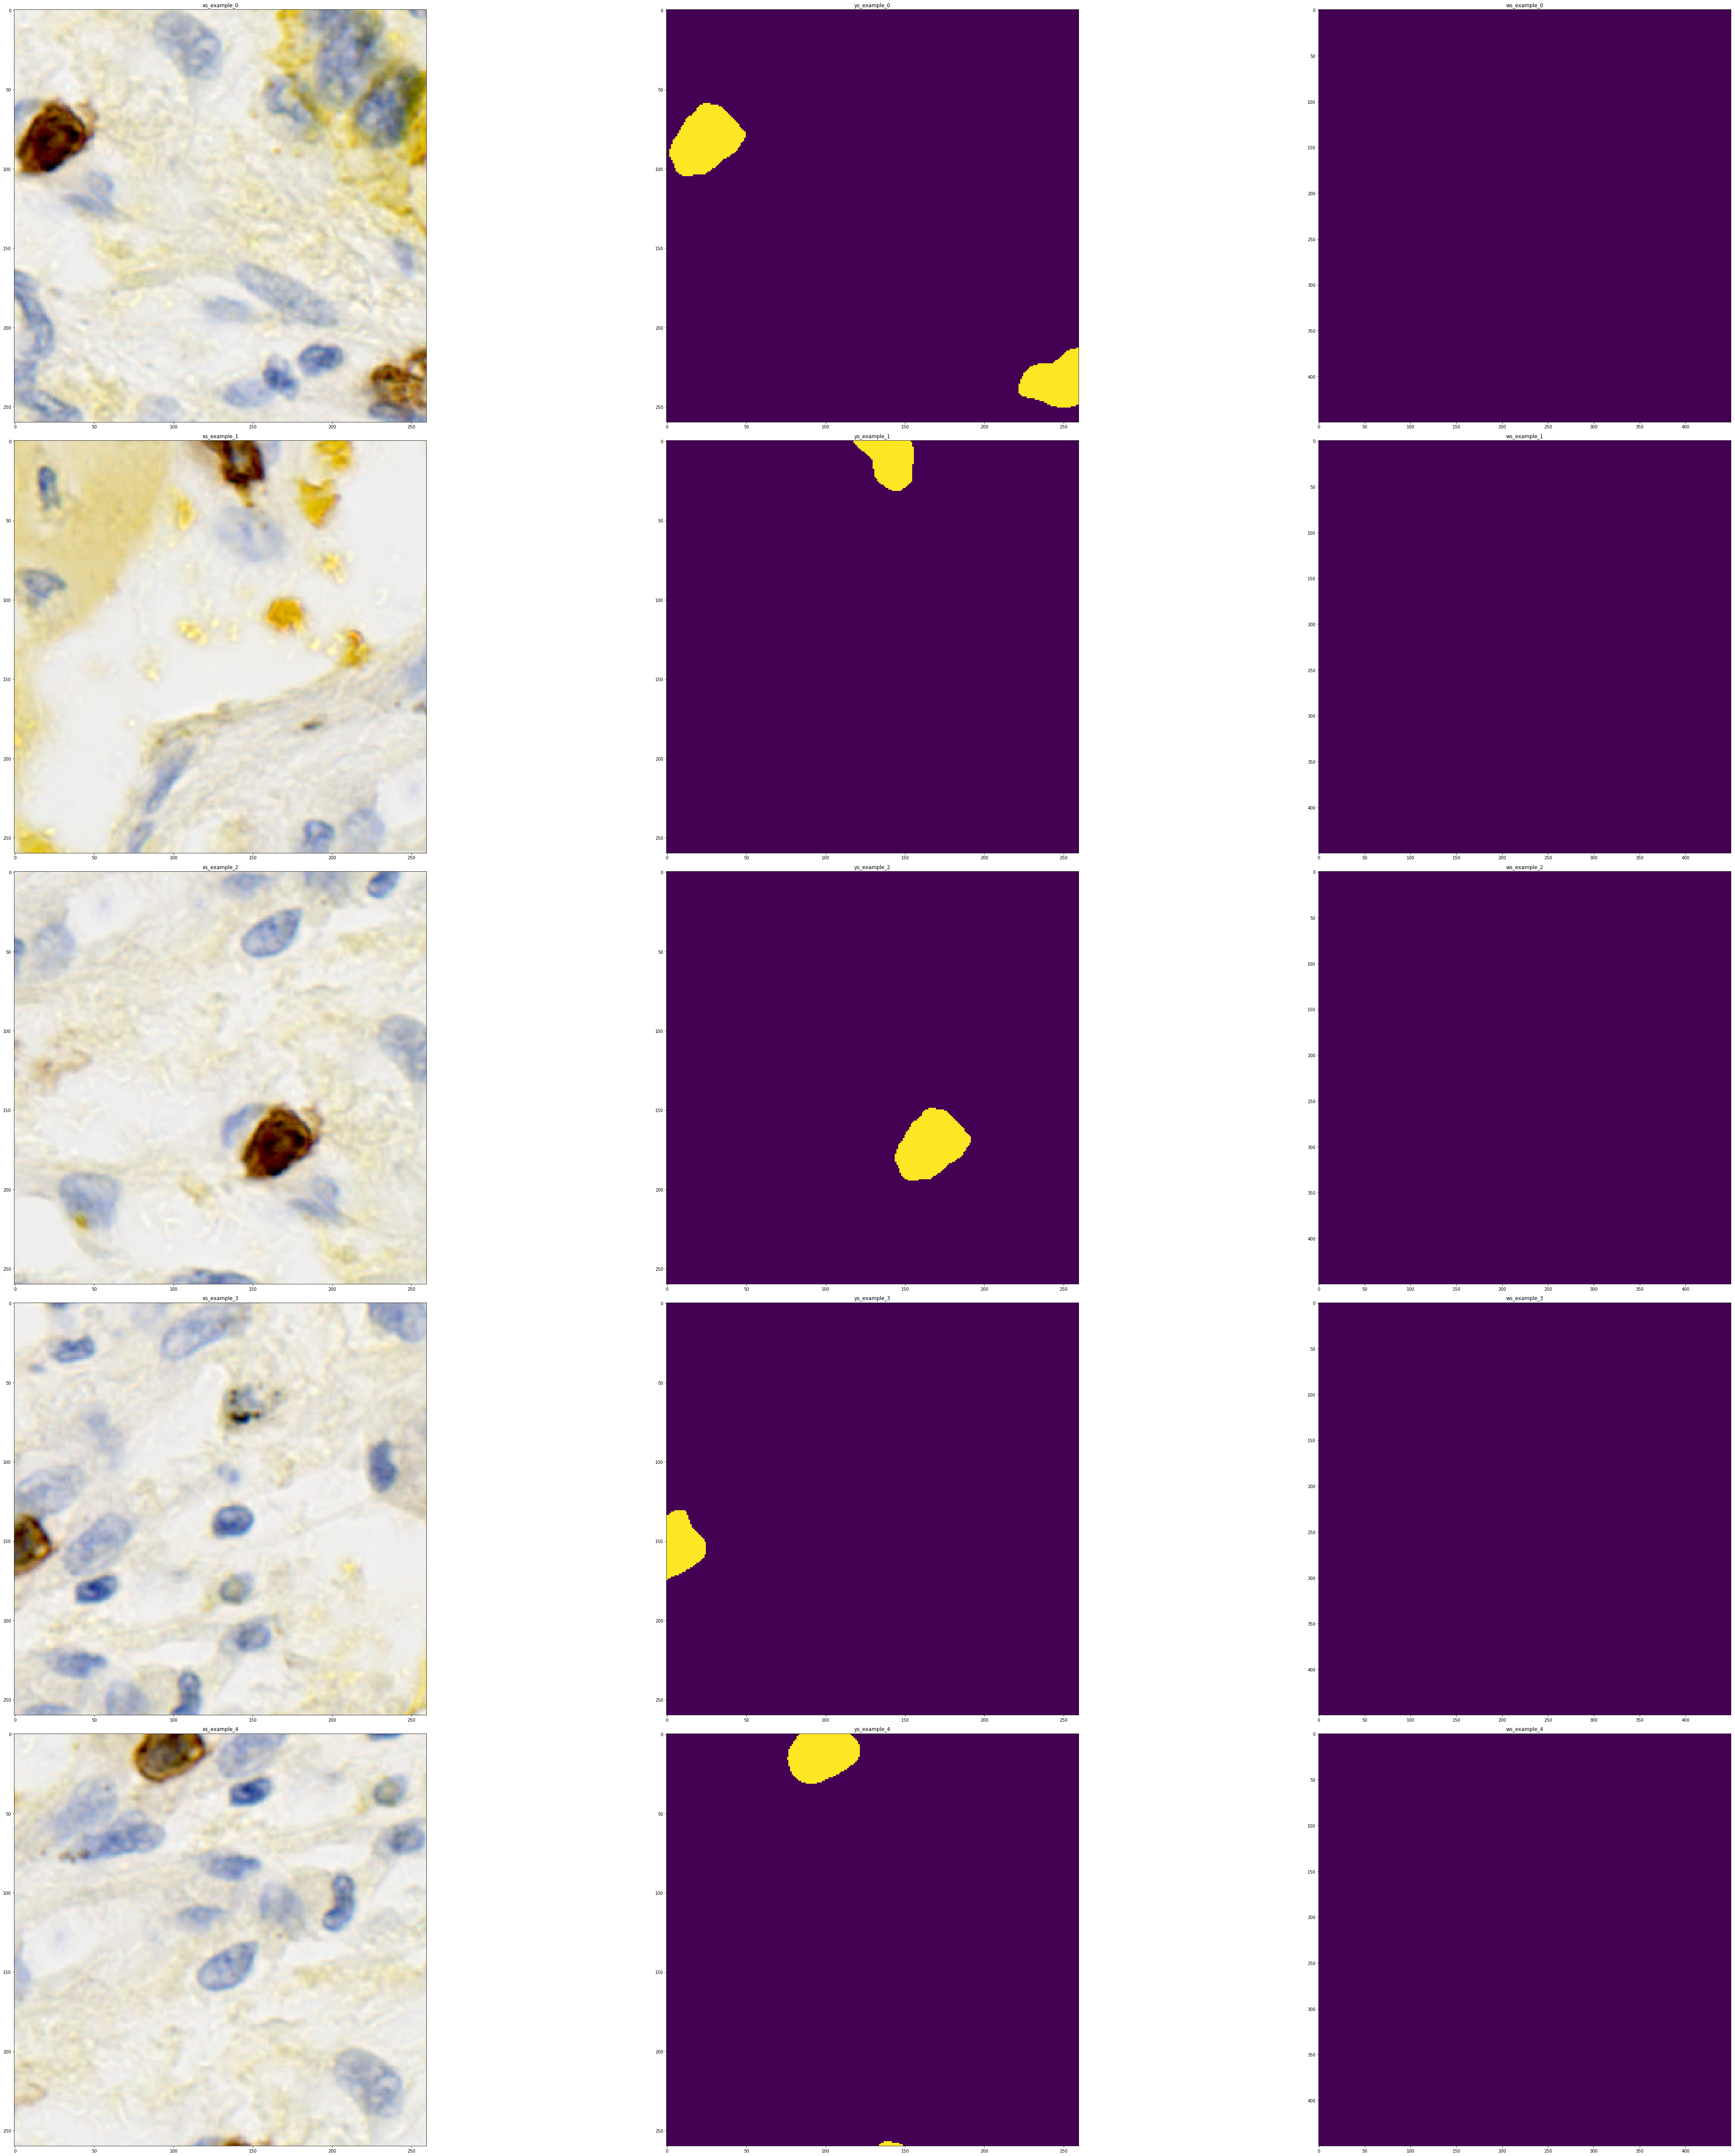

In [9]:
# Visualize some data
means = dataset.mean_features()
stds = dataset.std_features()
xs,ys,ws= dataset.sample_X_Y_W_patch_batch(input_patch_size,n_batch=5,fit=False, rotate=False)
xs_c = crop_receptive(xs,model_output_size[:2])
ys_c = crop_receptive(ys,model_output_size[:2])
ws_c = crop_receptive(np.expand_dims(ws,3),model_output_size[:2])
ys_imgs_c = from_categorical(ys_c)
show_batches([xs_c,ys_imgs_c,ws],["xs","ys","ws"])

In [47]:
# Train your model
histo = train(unet,dataset,n_batch=NBATCH,epochs=EPCS,just_train=JT,use_weights=USEW, W=W, name=NAME_NET)

=========== iteration 1/300 =============
Epoch 1/1
10/10 [==============================] - 2s 164ms/step
=========== iteration 2/300 =============
Epoch 1/1
10/10 [==============================] - 1s 133ms/step
=========== iteration 3/300 =============
Epoch 1/1
10/10 [==============================] - 1s 133ms/step
=========== iteration 4/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 5/300 =============
Epoch 1/1
10/10 [==============================] - 1s 132ms/step
=========== iteration 6/300 =============
Epoch 1/1
10/10 [==============================] - 1s 133ms/step
=========== iteration 7/300 =============
Epoch 1/1
10/10 [==============================] - 1s 133ms/step
=========== iteration 8/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 9/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 10/300 ========

10/10 [==============================] - 1s 134ms/step
=========== iteration 35/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 36/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 37/300 =============
Epoch 1/1
10/10 [==============================] - 1s 145ms/step
=========== iteration 38/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 39/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 40/300 =============
saving model: Unet_W100
Saved model to disk
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 41/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 42/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 43/300 ========

10/10 [==============================] - 1s 145ms/step
=========== iteration 102/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 103/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 104/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 105/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 106/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 107/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 108/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 109/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 110/300 =============
saving model: Unet_W100
Saved

10/10 [==============================] - 1s 135ms/step
=========== iteration 169/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 170/300 =============
saving model: Unet_W100
Saved model to disk
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 171/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 172/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 173/300 =============
Epoch 1/1
10/10 [==============================] - 1s 138ms/step
=========== iteration 174/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 175/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 176/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 177/300

Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 203/300 =============
Epoch 1/1
10/10 [==============================] - 1s 146ms/step
=========== iteration 204/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 205/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 206/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 207/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 208/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 209/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 210/300 =============
saving model: Unet_W100
Saved model to disk
Epoch 1/1
10/10 [==============================] - 1s 145ms/step
=========== iterati

10/10 [==============================] - 1s 135ms/step
=========== iteration 236/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 237/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 238/300 =============
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 239/300 =============
Epoch 1/1
10/10 [==============================] - 1s 138ms/step
=========== iteration 240/300 =============
saving model: Unet_W100
Saved model to disk
Epoch 1/1
10/10 [==============================] - 1s 135ms/step
=========== iteration 241/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 242/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 243/300 =============
Epoch 1/1
10/10 [==============================] - 1s 134ms/step
=========== iteration 244/300

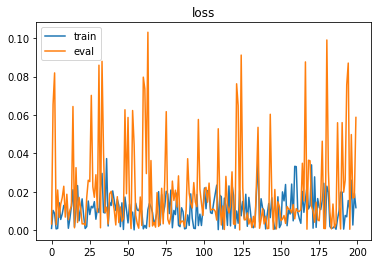

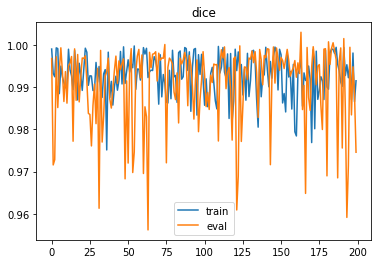

In [42]:
train_histo,eval_histo=histo
train_histo = np.array(train_histo)
eval_histo = np.array(eval_histo)

train_p, = plt.plot(train_histo[:,1], label='train')
plots = [train_p]
if eval_histo.shape > 0:
    eval_p, = plt.plot(eval_histo[:,2], label='eval')
    plots += [eval_p]
plt.title('loss')
plt.legend(handles=plots)
plt.show()

train_p, = plt.plot(train_histo[:,2], label='train')
plots = [train_p]
if eval_histo.shape > 0:
    eval_p, = plt.plot(eval_histo[:,1], label='eval')
    plots += [eval_p]
plt.title('dice')
plt.legend(handles=plots)
plt.show()

In [50]:
# Save model
unet.save_model(NAME_NET)
eval_histo = np.array(histo[0])
train_histo = np.array(histo[1])
train_histo.dump(NAME_NET+'_train_histo.pkl')
eval_histo.dump(NAME_NET+'_eval_histo.pkl')

Saved model to disk


In [7]:
!ls -l --block-size=M 

total 364M
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 27 19:02 Evaluation.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   8M Jan 30 08:58 Training.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 119M Jan 27 20:19 Unet_Train_1.h5
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 27 20:19 Unet_Train_1.json
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 27 20:19 Unet_Train_1_eval_histo.pkl
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 27 20:19 Unet_Train_1_train_histo.pkl
-rw-rw-r-- 1 ubuntu ubuntu 119M Jan 30 08:58 Unet_Train_2.h5
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 30 08:58 Unet_Train_2.json
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 30 08:58 Unet_Train_2_eval_histo.pkl
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 30 08:58 Unet_Train_2_train_histo.pkl
-rw-rw-r-- 1 ubuntu ubuntu 119M Jan 27 18:29 test_yw.h5
-rw-rw-r-- 1 ubuntu ubuntu   1M Jan 27 18:29 test_yw.json


In [51]:
# Load model
unet = Unet(model_input_size, classes=output_channels[0], regularized=REG)
unet.load_model(NAME_NET)
train_histo = np.load(NAME_NET+'_train_histo.pkl')
eval_histo = np.load(NAME_NET+'_eval_histo.pkl')

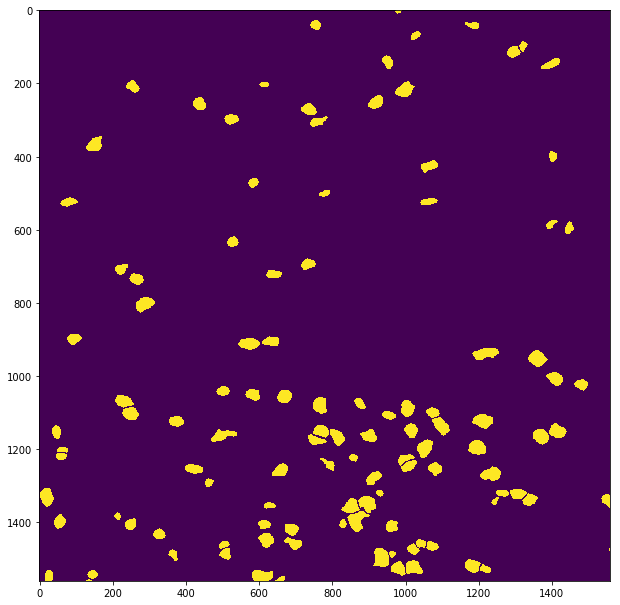

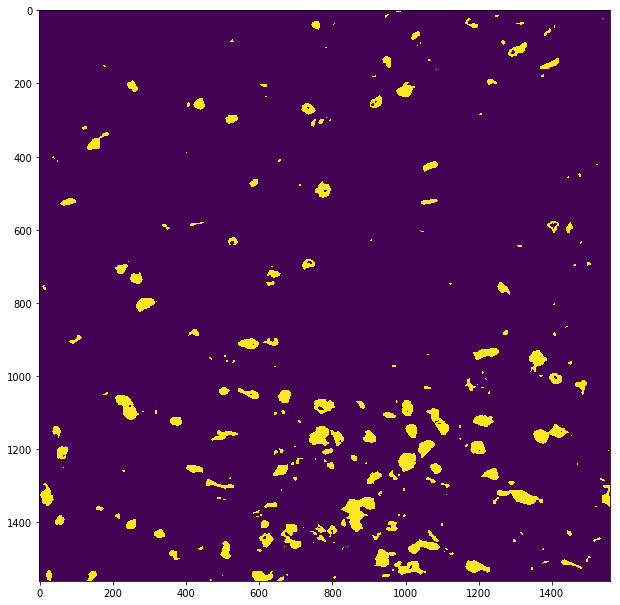

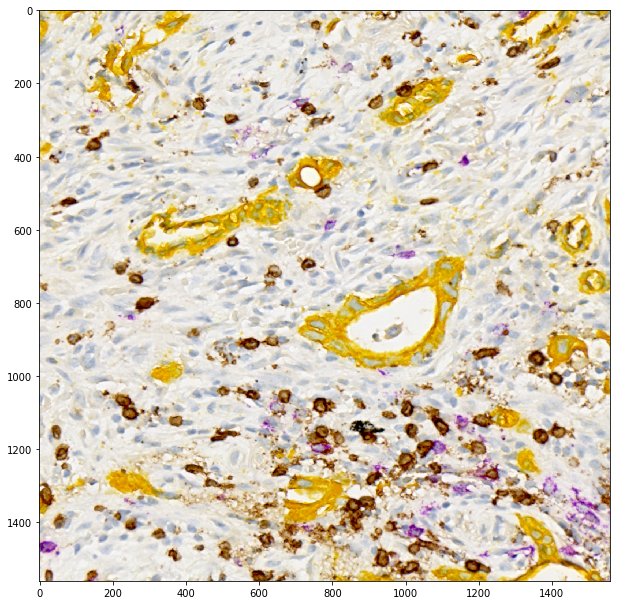

[['dice', 0.78220302154963062], ['Precision', 0.75349428208386282], ['Pc', 0.82909532328136981]]


In [52]:
# Show results

X,Y,W = dataset.get_X_Y_W(index=7,train=True)
Y_hat,crops = predict_full_image(unet,X)
cropsh,cropsw = crops

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5,forward=True)

Yimg = from_categorical(np.expand_dims(Y,0))[0]

plt.imshow(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
plt.show()


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5,forward=True)
plt.imshow(Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
plt.show()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5,forward=True)
plt.imshow(X[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]]*stds + means)
plt.show()

dice_s = dice(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
precision_s = precision(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
Pc_s = Pc(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])

table = [["dice",dice_s],
         ["Precision",precision_s],
         ["Pc",Pc_s]]
print(table)

# Mimo_Train

Training a UNET with basic paramters:

* input_h,iput_w = 450,450
* classes = 2
* targets = train_y, eval_y

In [2]:
input_patch_size = [450,450] # input patch (expect output to be smaller)
input_channels = [3] # RGB
output_channels = [3] #cell and bkg
NBATCH = 5 # example patch per batch
EPCS = 500 # epochs
REG = True # regularization
USEW = True # use weights
W = 10 # importance of weights
NAME_NET = 'Mimo_W10_3Class' # name for saving
JT = True # Just train set means no evaluation during training 

dataset_path = '../CD_Dataset'
trained_models_path = './trained_models'
NAME_NET = os.path.join(trained_models_path,NAME_NET)

In [3]:
# Load the dataset
dataset_path = '../CD_Dataset'
dataset = CD_Dataset( path=dataset_path, 
                     train_y_path="train_yc",  
                     eval_y_path="eval_yc", 
                     fit=True, 
                     download=True, 
                     num_classes=output_channels[0] )

('mean_features: ', array([ 0.86503507,  0.83272585,  0.72929356]))
('std_features: ', array([ 0.01255889,  0.01785996,  0.05625756]))


In [9]:
# Define your model
from models import dice_coef, precision
model_input_size = input_patch_size + input_channels
mimo = MimoNet(model_input_size, classes=output_channels[0], metrics=[dice_coef,precision], regularized=REG)
model_output_size = list(mimo.outputs_shape[0])
print("input size: {}\noutput_size: {}".format(model_input_size,model_output_size))

input size: [450, 450, 3]
output_size: [284, 284, 3]


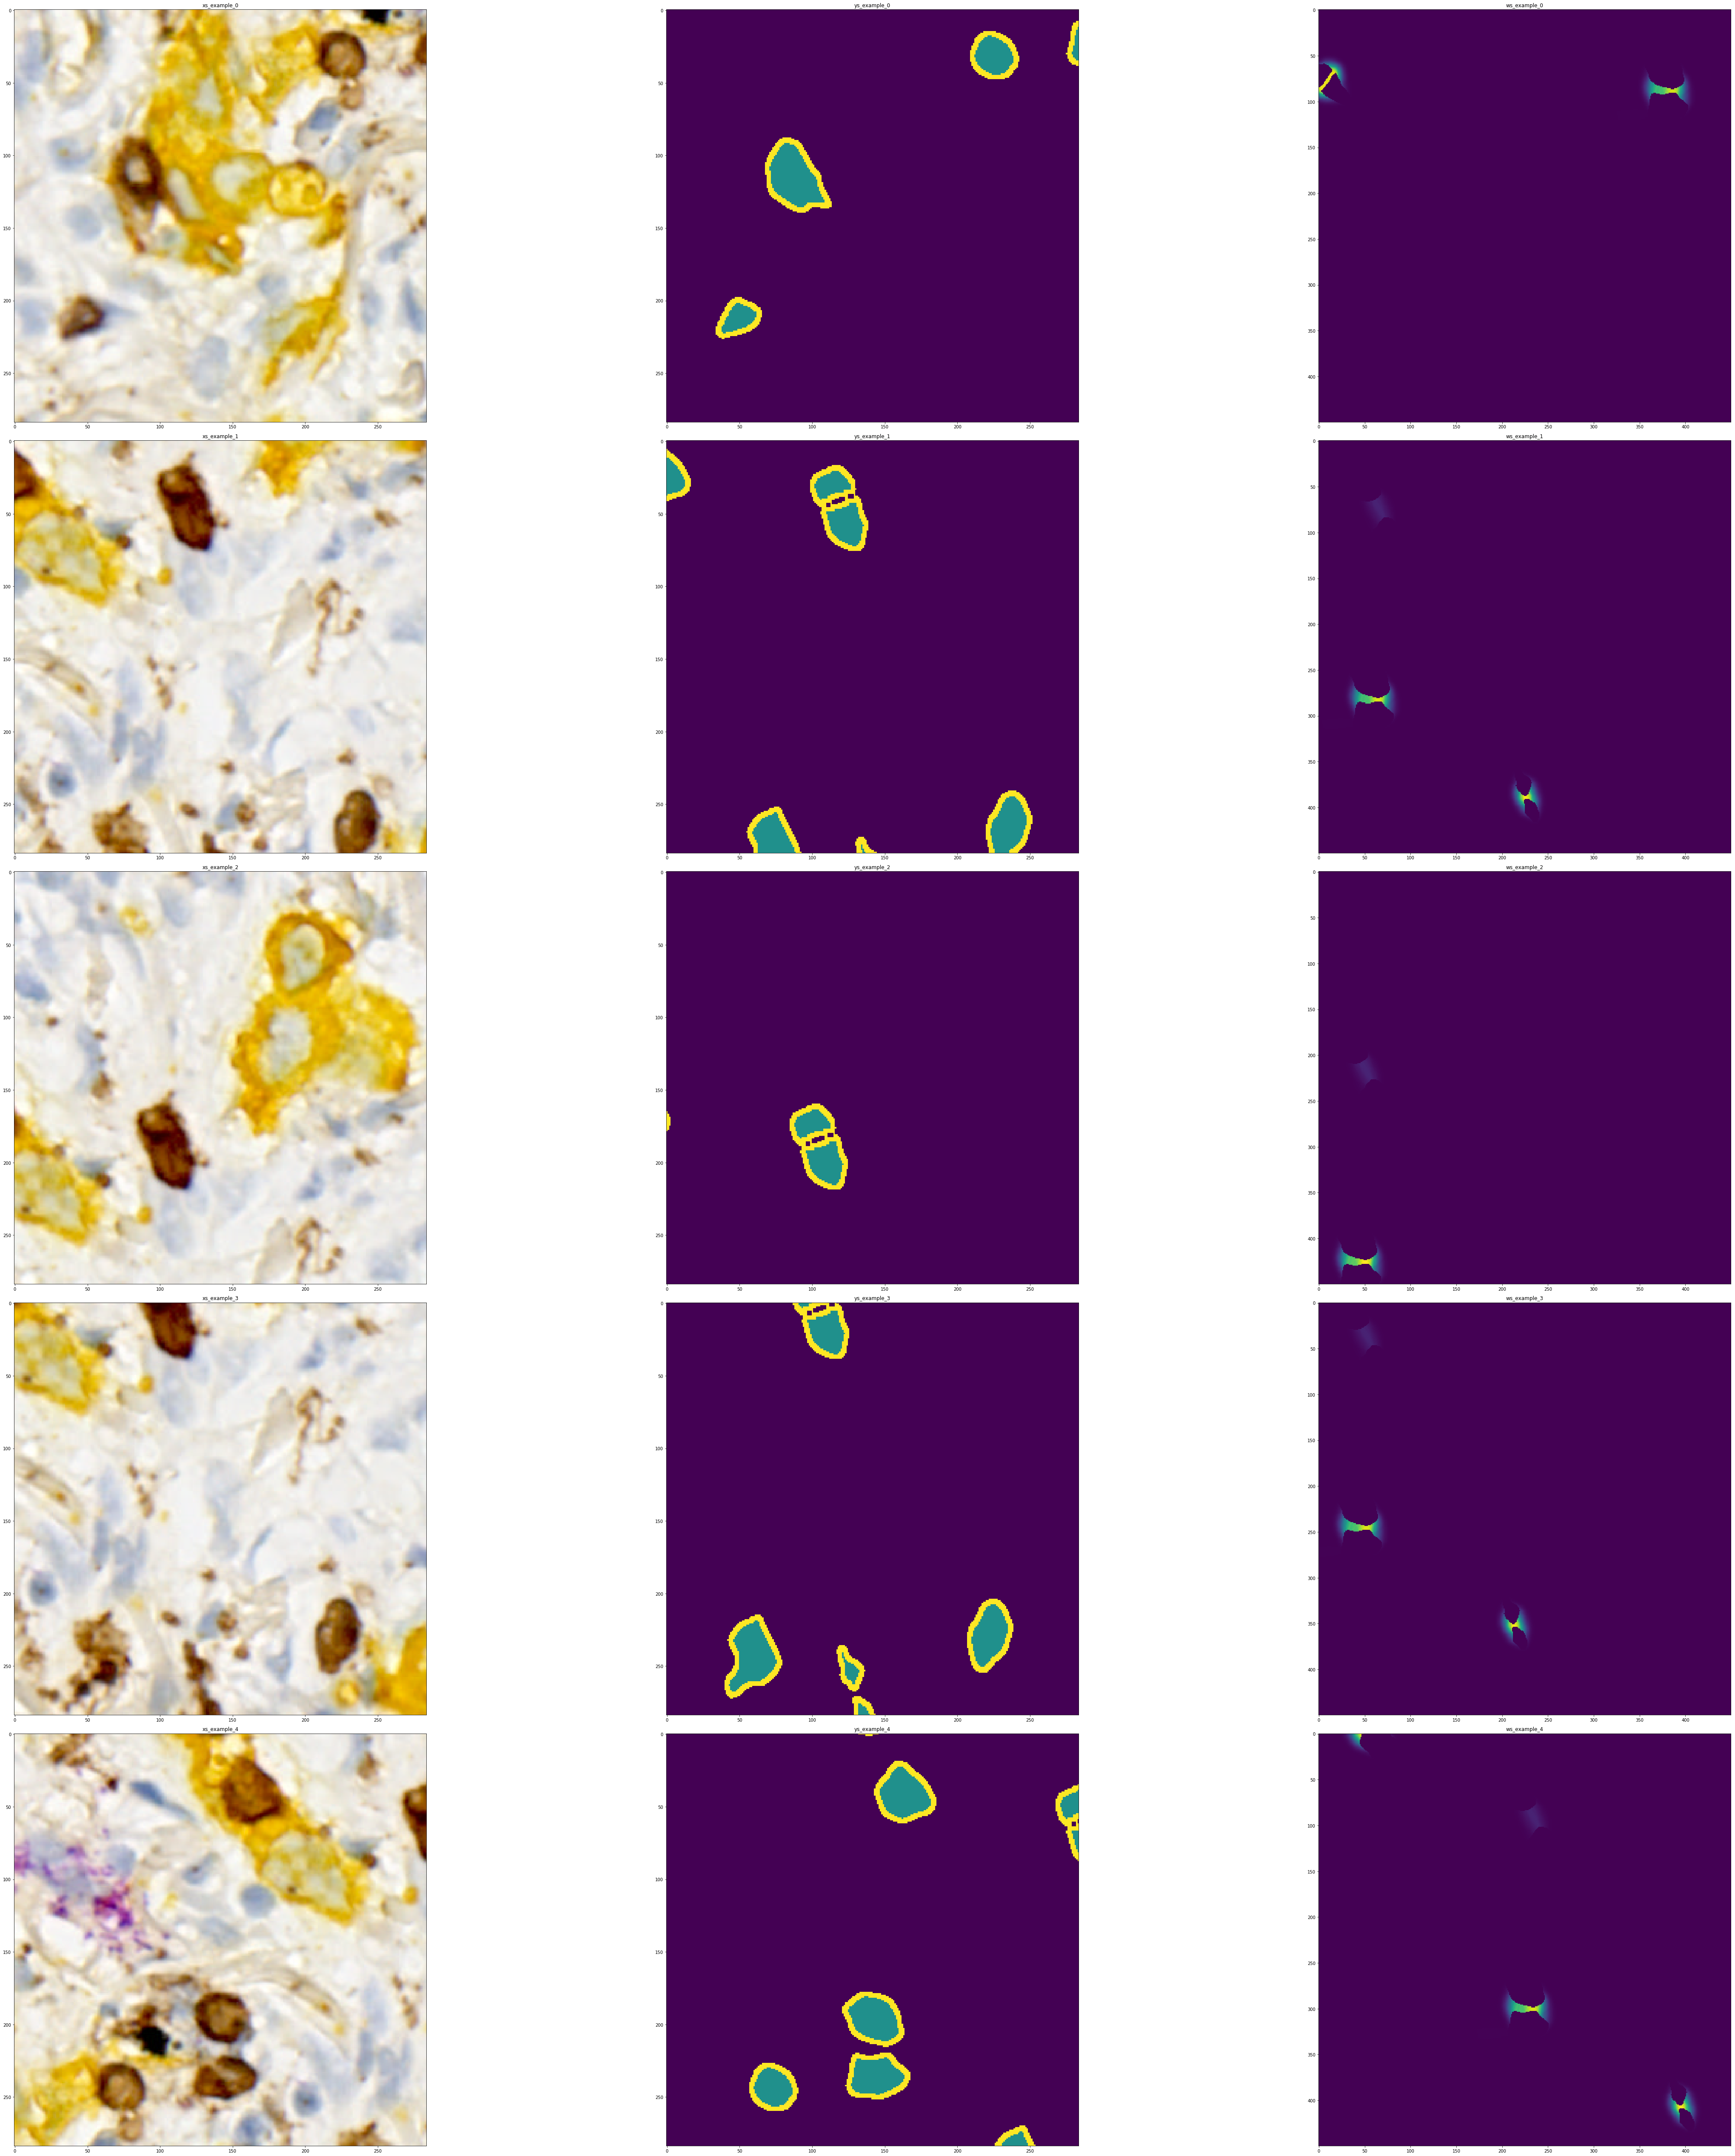

In [10]:
# Visualize some data
means = dataset.mean_features()
stds = dataset.std_features()
xs,ys,ws= dataset.sample_X_Y_W_patch_batch(input_patch_size,n_batch=5,fit=False, rotate=False)
xs_c = crop_receptive(xs,model_output_size[:2])
ys_c = crop_receptive(ys,model_output_size[:2])
ws_c = crop_receptive(np.expand_dims(ws,3),model_output_size[:2])
ys_imgs_c = from_categorical(ys_c)
show_batches([xs_c,ys_imgs_c,ws],["xs","ys","ws"])

In [5]:
# Train model
histo = train(mimo,dataset,n_batch=NBATCH,epochs=EPCS,
              just_train=JT,use_weights=USEW, W=W, name=NAME_NET)

=========== iteration 1/500 =============


/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Epoch 1/1
5/5 [==============================] - 12s 2s/step - loss: 5.4038 - la1_loss: 0.0112 - la2_loss: 0.0125 - la3_loss: 0.0196 - l0_loss: 0.0246 - la1_dice_coef: 0.9904 - la1_precision: 0.9876 - la2_dice_coef: 0.9904 - la2_precision: 0.9869 - la3_dice_coef: 0.9902 - la3_precision: 0.9863 - l0_dice_coef: 0.9904 - l0_precision: 0.9865
=========== iteration 2/500 =============
Epoch 1/1
5/5 [==============================] - 4s 700ms/step - loss: 5.4231 - la1_loss: 0.0197 - la2_loss: 0.0226 - la3_loss: 0.0367 - l0_loss: 0.0427 - la1_dice_coef: 0.9824 - la1_precision: 0.9778 - la2_dice_coef: 0.9831 - la2_precision: 0.9769 - la3_dice_coef: 0.9828 - la3_precision: 0.9761 - l0_dice_coef: 0.9841 - l0_precision: 0.9781
=========== iteration 3/500 =============
Epoch 1/1
5/5 [==============================] - 4s 706ms/step - loss: 5.3285 - la1_loss: 0.0101 - la2_loss: 0.0113 - la3_loss: 0.0189 - l0_loss: 0.0228 - la1_dice_coef: 0.9909 - la1_precision: 0.9882 - la2_dice_coef: 0.9913 - la2_p

5/5 [==============================] - 4s 713ms/step - loss: 4.8477 - la1_loss: 0.0163 - la2_loss: 0.0192 - la3_loss: 0.0311 - l0_loss: 0.0368 - la1_dice_coef: 0.9882 - la1_precision: 0.9813 - la2_dice_coef: 0.9886 - la2_precision: 0.9820 - la3_dice_coef: 0.9878 - la3_precision: 0.9825 - l0_dice_coef: 0.9888 - l0_precision: 0.9830    
=========== iteration 22/500 =============
Epoch 1/1
5/5 [==============================] - 4s 714ms/step - loss: 4.7683 - la1_loss: 0.0082 - la2_loss: 0.0090 - la3_loss: 0.0140 - l0_loss: 0.0174 - la1_dice_coef: 0.9940 - la1_precision: 0.9922 - la2_dice_coef: 0.9941 - la2_precision: 0.9923 - la3_dice_coef: 0.9939 - la3_precision: 0.9920 - l0_dice_coef: 0.9941 - l0_precision: 0.9922
=========== iteration 23/500 =============
Epoch 1/1
5/5 [==============================] - 4s 712ms/step - loss: 4.7768 - la1_loss: 0.0125 - la2_loss: 0.0147 - la3_loss: 0.0244 - l0_loss: 0.0296 - la1_dice_coef: 0.9894 - la1_precision: 0.9852 - la2_dice_coef: 0.9895 - la2_pre

5/5 [==============================] - 4s 715ms/step - loss: 4.3295 - la1_loss: 0.0023 - la2_loss: 0.0025 - la3_loss: 0.0039 - l0_loss: 0.0050 - la1_dice_coef: 0.9982 - la1_precision: 0.9979 - la2_dice_coef: 0.9985 - la2_precision: 0.9982 - la3_dice_coef: 0.9985 - la3_precision: 0.9982 - l0_dice_coef: 0.9985 - l0_precision: 0.9981      
=========== iteration 42/500 =============
Epoch 1/1
5/5 [==============================] - 4s 716ms/step - loss: 4.3355 - la1_loss: 0.0068 - la2_loss: 0.0072 - la3_loss: 0.0104 - l0_loss: 0.0143 - la1_dice_coef: 0.9947 - la1_precision: 0.9940 - la2_dice_coef: 0.9954 - la2_precision: 0.9947 - la3_dice_coef: 0.9957 - la3_precision: 0.9950 - l0_dice_coef: 0.9956 - l0_precision: 0.9949
=========== iteration 43/500 =============
Epoch 1/1
5/5 [==============================] - 4s 716ms/step - loss: 4.4862 - la1_loss: 0.0338 - la2_loss: 0.0383 - la3_loss: 0.0611 - l0_loss: 0.0751 - la1_dice_coef: 0.9727 - la1_precision: 0.9640 - la2_dice_coef: 0.9740 - la2_p

5/5 [==============================] - 4s 721ms/step - loss: 3.9849 - la1_loss: 0.0017 - la2_loss: 0.0017 - la3_loss: 0.0031 - l0_loss: 0.0040 - la1_dice_coef: 0.9996 - la1_precision: 0.9993 - la2_dice_coef: 0.9996 - la2_precision: 0.9994 - la3_dice_coef: 0.9996 - la3_precision: 0.9994 - l0_dice_coef: 0.9995 - l0_precision: 0.9993
=========== iteration 62/500 =============
Epoch 1/1
5/5 [==============================] - 4s 720ms/step - loss: 3.9779 - la1_loss: 0.0024 - la2_loss: 0.0033 - la3_loss: 0.0056 - l0_loss: 0.0074 - la1_dice_coef: 0.9998 - la1_precision: 0.9995 - la2_dice_coef: 0.9992 - la2_precision: 0.9985 - la3_dice_coef: 0.9990 - la3_precision: 0.9981 - l0_dice_coef: 0.9990 - l0_precision: 0.9980
=========== iteration 63/500 =============
Epoch 1/1
5/5 [==============================] - 4s 718ms/step - loss: 4.0296 - la1_loss: 0.0124 - la2_loss: 0.0156 - la3_loss: 0.0255 - l0_loss: 0.0317 - la1_dice_coef: 0.9895 - la1_precision: 0.9851 - la2_dice_coef: 0.9888 - la2_precisi

5/5 [==============================] - 4s 718ms/step - loss: 3.7615 - la1_loss: 0.0108 - la2_loss: 0.0121 - la3_loss: 0.0193 - l0_loss: 0.0241 - la1_dice_coef: 0.9904 - la1_precision: 0.9876 - la2_dice_coef: 0.9909 - la2_precision: 0.9880 - la3_dice_coef: 0.9907 - la3_precision: 0.9880 - l0_dice_coef: 0.9908 - l0_precision: 0.9877
=========== iteration 82/500 =============
Epoch 1/1
5/5 [==============================] - 4s 721ms/step - loss: 3.7247 - la1_loss: 0.0072 - la2_loss: 0.0081 - la3_loss: 0.0117 - l0_loss: 0.0154 - la1_dice_coef: 0.9935 - la1_precision: 0.9920 - la2_dice_coef: 0.9938 - la2_precision: 0.9923 - la3_dice_coef: 0.9945 - la3_precision: 0.9929 - l0_dice_coef: 0.9943 - l0_precision: 0.9928
=========== iteration 83/500 =============
Epoch 1/1
5/5 [==============================] - 4s 716ms/step - loss: 3.7125 - la1_loss: 0.0073 - la2_loss: 0.0081 - la3_loss: 0.0119 - l0_loss: 0.0158 - la1_dice_coef: 0.9939 - la1_precision: 0.9929 - la2_dice_coef: 0.9945 - la2_precisi

5/5 [==============================] - 4s 717ms/step - loss: 3.4924 - la1_loss: 0.0067 - la2_loss: 0.0070 - la3_loss: 0.0102 - l0_loss: 0.0139 - la1_dice_coef: 0.9947 - la1_precision: 0.9939 - la2_dice_coef: 0.9955 - la2_precision: 0.9947 - la3_dice_coef: 0.9958 - la3_precision: 0.9949 - l0_dice_coef: 0.9957 - l0_precision: 0.9948
=========== iteration 102/500 =============
Epoch 1/1
5/5 [==============================] - 4s 718ms/step - loss: 3.4674 - la1_loss: 0.0045 - la2_loss: 0.0046 - la3_loss: 0.0062 - l0_loss: 0.0090 - la1_dice_coef: 0.9969 - la1_precision: 0.9967 - la2_dice_coef: 0.9973 - la2_precision: 0.9970 - la3_dice_coef: 0.9975 - la3_precision: 0.9971 - l0_dice_coef: 0.9974 - l0_precision: 0.9971
=========== iteration 103/500 =============
Epoch 1/1
5/5 [==============================] - 4s 722ms/step - loss: 3.4352 - la1_loss: 5.6326e-04 - la2_loss: 5.3256e-04 - la3_loss: 0.0010 - l0_loss: 0.0013 - la1_dice_coef: 1.0000 - la1_precision: 0.9999 - la2_dice_coef: 0.9999 - l

5/5 [==============================] - 4s 718ms/step - loss: 3.2617 - la1_loss: 0.0023 - la2_loss: 0.0030 - la3_loss: 0.0050 - l0_loss: 0.0062 - la1_dice_coef: 0.9980 - la1_precision: 0.9971 - la2_dice_coef: 0.9980 - la2_precision: 0.9968 - la3_dice_coef: 0.9979 - la3_precision: 0.9967 - l0_dice_coef: 0.9979 - l0_precision: 0.9967
=========== iteration 122/500 =============
Epoch 1/1
5/5 [==============================] - 4s 717ms/step - loss: 3.3222 - la1_loss: 0.0154 - la2_loss: 0.0166 - la3_loss: 0.0215 - l0_loss: 0.0335 - la1_dice_coef: 0.9899 - la1_precision: 0.9892 - la2_dice_coef: 0.9906 - la2_precision: 0.9893 - la3_dice_coef: 0.9914 - la3_precision: 0.9902 - l0_dice_coef: 0.9909 - l0_precision: 0.9895    
=========== iteration 123/500 =============
Epoch 1/1
5/5 [==============================] - 4s 717ms/step - loss: 3.2565 - la1_loss: 0.0044 - la2_loss: 0.0057 - la3_loss: 0.0098 - l0_loss: 0.0115 - la1_dice_coef: 0.9964 - la1_precision: 0.9949 - la2_dice_coef: 0.9962 - la2_p

5/5 [==============================] - 4s 719ms/step - loss: 3.0844 - la1_loss: 0.0046 - la2_loss: 0.0053 - la3_loss: 0.0077 - l0_loss: 0.0101 - la1_dice_coef: 0.9962 - la1_precision: 0.9954 - la2_dice_coef: 0.9963 - la2_precision: 0.9952 - la3_dice_coef: 0.9967 - la3_precision: 0.9958 - l0_dice_coef: 0.9965 - l0_precision: 0.9955      
=========== iteration 142/500 =============
Epoch 1/1
5/5 [==============================] - 4s 720ms/step - loss: 3.1022 - la1_loss: 0.0087 - la2_loss: 0.0098 - la3_loss: 0.0160 - l0_loss: 0.0200 - la1_dice_coef: 0.9923 - la1_precision: 0.9903 - la2_dice_coef: 0.9926 - la2_precision: 0.9902 - la3_dice_coef: 0.9926 - la3_precision: 0.9905 - l0_dice_coef: 0.9925 - l0_precision: 0.9900
=========== iteration 143/500 =============
Epoch 1/1
5/5 [==============================] - 4s 719ms/step - loss: 3.0403 - la1_loss: 2.9164e-04 - la2_loss: 2.1423e-04 - la3_loss: 3.7902e-04 - l0_loss: 5.5272e-04 - la1_dice_coef: 1.0000 - la1_precision: 1.0000 - la2_dice_co

5/5 [==============================] - 4s 720ms/step - loss: 3.0784 - la1_loss: 0.0314 - la2_loss: 0.0355 - la3_loss: 0.0552 - l0_loss: 0.0709 - la1_dice_coef: 0.9763 - la1_precision: 0.9684 - la2_dice_coef: 0.9782 - la2_precision: 0.9694 - la3_dice_coef: 0.9791 - la3_precision: 0.9700 - l0_dice_coef: 0.9787 - l0_precision: 0.9697
=========== iteration 162/500 =============
Epoch 1/1
5/5 [==============================] - 4s 722ms/step - loss: 3.0936 - la1_loss: 0.0321 - la2_loss: 0.0392 - la3_loss: 0.0662 - l0_loss: 0.0788 - la1_dice_coef: 0.9782 - la1_precision: 0.9581 - la2_dice_coef: 0.9785 - la2_precision: 0.9585 - la3_dice_coef: 0.9790 - la3_precision: 0.9578 - l0_dice_coef: 0.9787 - l0_precision: 0.9579
=========== iteration 163/500 =============
Epoch 1/1
5/5 [==============================] - 4s 725ms/step - loss: 2.8719 - la1_loss: 4.6930e-04 - la2_loss: 4.2234e-04 - la3_loss: 7.0419e-04 - l0_loss: 9.3946e-04 - la1_dice_coef: 0.9997 - la1_precision: 0.9996 - la2_dice_coef: 0.

5/5 [==============================] - 4s 720ms/step - loss: 2.7991 - la1_loss: 0.0100 - la2_loss: 0.0125 - la3_loss: 0.0188 - l0_loss: 0.0253 - la1_dice_coef: 0.9941 - la1_precision: 0.9883 - la2_dice_coef: 0.9939 - la2_precision: 0.9882 - la3_dice_coef: 0.9941 - la3_precision: 0.9886 - l0_dice_coef: 0.9936 - l0_precision: 0.9877      
=========== iteration 182/500 =============
Epoch 1/1
5/5 [==============================] - 4s 720ms/step - loss: 2.7809 - la1_loss: 0.0082 - la2_loss: 0.0099 - la3_loss: 0.0165 - l0_loss: 0.0209 - la1_dice_coef: 0.9931 - la1_precision: 0.9896 - la2_dice_coef: 0.9929 - la2_precision: 0.9893 - la3_dice_coef: 0.9929 - la3_precision: 0.9892 - l0_dice_coef: 0.9922 - l0_precision: 0.9887
=========== iteration 183/500 =============
Epoch 1/1
5/5 [==============================] - 4s 719ms/step - loss: 2.7525 - la1_loss: 0.0058 - la2_loss: 0.0061 - la3_loss: 0.0096 - l0_loss: 0.0127 - la1_dice_coef: 0.9952 - la1_precision: 0.9924 - la2_dice_coef: 0.9965 - la2

5/5 [==============================] - 4s 721ms/step - loss: 2.5962 - la1_loss: 1.1388e-04 - la2_loss: 1.1402e-04 - la3_loss: 1.8594e-04 - l0_loss: 2.9760e-04 - la1_dice_coef: 1.0000 - la1_precision: 1.0000 - la2_dice_coef: 1.0000 - la2_precision: 1.0000 - la3_dice_coef: 1.0000 - la3_precision: 1.0000 - l0_dice_coef: 1.0000 - l0_precision: 1.0000
=========== iteration 202/500 =============
Epoch 1/1
5/5 [==============================] - 4s 718ms/step - loss: 2.6170 - la1_loss: 0.0046 - la2_loss: 0.0051 - la3_loss: 0.0080 - l0_loss: 0.0107 - la1_dice_coef: 0.9967 - la1_precision: 0.9962 - la2_dice_coef: 0.9971 - la2_precision: 0.9966 - la3_dice_coef: 0.9970 - la3_precision: 0.9963 - l0_dice_coef: 0.9970 - l0_precision: 0.9965      
=========== iteration 203/500 =============
Epoch 1/1
5/5 [==============================] - 4s 723ms/step - loss: 2.6529 - la1_loss: 0.0116 - la2_loss: 0.0126 - la3_loss: 0.0210 - l0_loss: 0.0259 - la1_dice_coef: 0.9889 - la1_precision: 0.9854 - la2_dice_co

5/5 [==============================] - 4s 722ms/step - loss: 2.4801 - la1_loss: 0.0016 - la2_loss: 0.0019 - la3_loss: 0.0033 - l0_loss: 0.0042 - la1_dice_coef: 0.9989 - la1_precision: 0.9985 - la2_dice_coef: 0.9990 - la2_precision: 0.9984 - la3_dice_coef: 0.9989 - la3_precision: 0.9983 - l0_dice_coef: 0.9988 - l0_precision: 0.9981  
=========== iteration 222/500 =============
Epoch 1/1
5/5 [==============================] - 4s 720ms/step - loss: 2.4868 - la1_loss: 0.0033 - la2_loss: 0.0043 - la3_loss: 0.0074 - l0_loss: 0.0087 - la1_dice_coef: 0.9974 - la1_precision: 0.9963 - la2_dice_coef: 0.9971 - la2_precision: 0.9960 - la3_dice_coef: 0.9968 - la3_precision: 0.9957 - l0_dice_coef: 0.9970 - l0_precision: 0.9958
=========== iteration 223/500 =============
Epoch 1/1
5/5 [==============================] - 4s 722ms/step - loss: 2.4598 - la1_loss: 3.9861e-04 - la2_loss: 4.2938e-04 - la3_loss: 7.7765e-04 - l0_loss: 0.0010 - la1_dice_coef: 0.9999 - la1_precision: 0.9999 - la2_dice_coef: 0.99

5/5 [==============================] - 4s 719ms/step - loss: 2.6506 - la1_loss: 0.0452 - la2_loss: 0.0546 - la3_loss: 0.0873 - l0_loss: 0.1096 - la1_dice_coef: 0.9662 - la1_precision: 0.9332 - la2_dice_coef: 0.9672 - la2_precision: 0.9373 - la3_dice_coef: 0.9644 - la3_precision: 0.9409 - l0_dice_coef: 0.9622 - l0_precision: 0.9321
=========== iteration 242/500 =============
Epoch 1/1
5/5 [==============================] - 4s 720ms/step - loss: 2.3532 - la1_loss: 8.0682e-04 - la2_loss: 8.2979e-04 - la3_loss: 0.0012 - l0_loss: 0.0017 - la1_dice_coef: 0.9993 - la1_precision: 0.9992 - la2_dice_coef: 0.9993 - la2_precision: 0.9992 - la3_dice_coef: 0.9993 - la3_precision: 0.9992 - l0_dice_coef: 0.9993 - l0_precision: 0.9992
=========== iteration 243/500 =============
Epoch 1/1
5/5 [==============================] - 4s 719ms/step - loss: 2.4027 - la1_loss: 0.0076 - la2_loss: 0.0108 - la3_loss: 0.0183 - l0_loss: 0.0228 - la1_dice_coef: 0.9934 - la1_precision: 0.9911 - la2_dice_coef: 0.9927 - l

5/5 [==============================] - 4s 720ms/step - loss: 2.2514 - la1_loss: 4.0969e-04 - la2_loss: 4.3258e-04 - la3_loss: 9.3720e-04 - l0_loss: 0.0012 - la1_dice_coef: 0.9999 - la1_precision: 0.9998 - la2_dice_coef: 0.9999 - la2_precision: 0.9998 - la3_dice_coef: 0.9998 - la3_precision: 0.9997 - l0_dice_coef: 0.9998 - l0_precision: 0.9997
=========== iteration 262/500 =============
Epoch 1/1
5/5 [==============================] - 4s 720ms/step - loss: 2.2751 - la1_loss: 0.0049 - la2_loss: 0.0057 - la3_loss: 0.0093 - l0_loss: 0.0118 - la1_dice_coef: 0.9963 - la1_precision: 0.9947 - la2_dice_coef: 0.9964 - la2_precision: 0.9948 - la3_dice_coef: 0.9964 - la3_precision: 0.9947 - l0_dice_coef: 0.9961 - l0_precision: 0.9946
=========== iteration 263/500 =============
Epoch 1/1
5/5 [==============================] - 4s 719ms/step - loss: 2.2735 - la1_loss: 0.0065 - la2_loss: 0.0060 - la3_loss: 0.0096 - l0_loss: 0.0130 - la1_dice_coef: 0.9937 - la1_precision: 0.9920 - la2_dice_coef: 0.9958

5/5 [==============================] - 4s 722ms/step - loss: 2.2180 - la1_loss: 0.0096 - la2_loss: 0.0119 - la3_loss: 0.0209 - l0_loss: 0.0250 - la1_dice_coef: 0.9912 - la1_precision: 0.9873 - la2_dice_coef: 0.9907 - la2_precision: 0.9868 - la3_dice_coef: 0.9903 - la3_precision: 0.9863 - l0_dice_coef: 0.9902 - l0_precision: 0.9862
=========== iteration 282/500 =============
Epoch 1/1
5/5 [==============================] - 4s 720ms/step - loss: 2.3400 - la1_loss: 0.0314 - la2_loss: 0.0353 - la3_loss: 0.0563 - l0_loss: 0.0709 - la1_dice_coef: 0.9735 - la1_precision: 0.9642 - la2_dice_coef: 0.9751 - la2_precision: 0.9663 - la3_dice_coef: 0.9757 - la3_precision: 0.9659 - l0_dice_coef: 0.9754 - l0_precision: 0.9660
=========== iteration 283/500 =============
Epoch 1/1
5/5 [==============================] - 4s 717ms/step - loss: 2.1652 - la1_loss: 0.0035 - la2_loss: 0.0043 - la3_loss: 0.0070 - l0_loss: 0.0088 - la1_dice_coef: 0.9974 - la1_precision: 0.9960 - la2_dice_coef: 0.9974 - la2_preci

5/5 [==============================] - 4s 721ms/step - loss: 2.1406 - la1_loss: 0.0142 - la2_loss: 0.0142 - la3_loss: 0.0204 - l0_loss: 0.0288 - la1_dice_coef: 0.9891 - la1_precision: 0.9869 - la2_dice_coef: 0.9904 - la2_precision: 0.9879 - la3_dice_coef: 0.9909 - la3_precision: 0.9886 - l0_dice_coef: 0.9904 - l0_precision: 0.9877
=========== iteration 302/500 =============
Epoch 1/1
5/5 [==============================] - 4s 723ms/step - loss: 2.4292 - la1_loss: 0.0562 - la2_loss: 0.0680 - la3_loss: 0.1093 - l0_loss: 0.1373 - la1_dice_coef: 0.9680 - la1_precision: 0.9265 - la2_dice_coef: 0.9687 - la2_precision: 0.9281 - la3_dice_coef: 0.9701 - la3_precision: 0.9305 - l0_dice_coef: 0.9691 - l0_precision: 0.9277
=========== iteration 303/500 =============
Epoch 1/1
5/5 [==============================] - 4s 723ms/step - loss: 2.0550 - la1_loss: 1.0439e-04 - la2_loss: 6.9160e-05 - la3_loss: 1.6037e-04 - l0_loss: 2.5165e-04 - la1_dice_coef: 1.0000 - la1_precision: 1.0000 - la2_dice_coef: 1.

5/5 [==============================] - 4s 721ms/step - loss: 1.9855 - la1_loss: 4.1498e-04 - la2_loss: 4.1504e-04 - la3_loss: 9.2029e-04 - l0_loss: 0.0012 - la1_dice_coef: 1.0000 - la1_precision: 1.0000 - la2_dice_coef: 0.9999 - la2_precision: 0.9999 - la3_dice_coef: 0.9999 - la3_precision: 0.9998 - l0_dice_coef: 0.9999 - l0_precision: 0.9998
=========== iteration 322/500 =============
Epoch 1/1
5/5 [==============================] - 4s 719ms/step - loss: 2.1582 - la1_loss: 0.0277 - la2_loss: 0.0325 - la3_loss: 0.0540 - l0_loss: 0.0653 - la1_dice_coef: 0.9762 - la1_precision: 0.9670 - la2_dice_coef: 0.9777 - la2_precision: 0.9682 - la3_dice_coef: 0.9775 - la3_precision: 0.9680 - l0_dice_coef: 0.9780 - l0_precision: 0.9682
=========== iteration 323/500 =============
Epoch 1/1
5/5 [==============================] - 4s 721ms/step - loss: 2.1899 - la1_loss: 0.0321 - la2_loss: 0.0385 - la3_loss: 0.0647 - l0_loss: 0.0796 - la1_dice_coef: 0.9779 - la1_precision: 0.9574 - la2_dice_coef: 0.9790

5/5 [==============================] - 4s 724ms/step - loss: 2.2562 - la1_loss: 0.0555 - la2_loss: 0.0670 - la3_loss: 0.0962 - l0_loss: 0.1295 - la1_dice_coef: 0.9701 - la1_precision: 0.9224 - la2_dice_coef: 0.9704 - la2_precision: 0.9256 - la3_dice_coef: 0.9739 - la3_precision: 0.9378 - l0_dice_coef: 0.9725 - l0_precision: 0.9293
=========== iteration 342/500 =============
Epoch 1/1
5/5 [==============================] - 4s 717ms/step - loss: 1.9076 - la1_loss: 4.2091e-04 - la2_loss: 4.6107e-04 - la3_loss: 7.9665e-04 - l0_loss: 0.0011 - la1_dice_coef: 0.9998 - la1_precision: 0.9996 - la2_dice_coef: 0.9999 - la2_precision: 0.9997 - la3_dice_coef: 0.9999 - la3_precision: 0.9997 - l0_dice_coef: 0.9998 - l0_precision: 0.9997
=========== iteration 343/500 =============
Epoch 1/1
5/5 [==============================] - 4s 717ms/step - loss: 1.9893 - la1_loss: 0.0134 - la2_loss: 0.0142 - la3_loss: 0.0266 - l0_loss: 0.0335 - la1_dice_coef: 0.9870 - la1_precision: 0.9830 - la2_dice_coef: 0.9881

5/5 [==============================] - 4s 720ms/step - loss: 1.8787 - la1_loss: 0.0063 - la2_loss: 0.0073 - la3_loss: 0.0113 - l0_loss: 0.0146 - la1_dice_coef: 0.9951 - la1_precision: 0.9937 - la2_dice_coef: 0.9952 - la2_precision: 0.9939 - la3_dice_coef: 0.9953 - la3_precision: 0.9938 - l0_dice_coef: 0.9953 - l0_precision: 0.9937    
=========== iteration 362/500 =============
Epoch 1/1
5/5 [==============================] - 4s 721ms/step - loss: 1.8373 - la1_loss: 2.1721e-04 - la2_loss: 2.0198e-04 - la3_loss: 4.2475e-04 - l0_loss: 6.3179e-04 - la1_dice_coef: 1.0000 - la1_precision: 1.0000 - la2_dice_coef: 1.0000 - la2_precision: 1.0000 - la3_dice_coef: 1.0000 - la3_precision: 1.0000 - l0_dice_coef: 1.0000 - l0_precision: 0.9999
=========== iteration 363/500 =============
Epoch 1/1
5/5 [==============================] - 4s 719ms/step - loss: 1.9709 - la1_loss: 0.0208 - la2_loss: 0.0252 - la3_loss: 0.0414 - l0_loss: 0.0511 - la1_dice_coef: 0.9835 - la1_precision: 0.9724 - la2_dice_coef

5/5 [==============================] - 4s 724ms/step - loss: 1.8101 - la1_loss: 0.0051 - la2_loss: 0.0066 - la3_loss: 0.0108 - l0_loss: 0.0129 - la1_dice_coef: 0.9957 - la1_precision: 0.9944 - la2_dice_coef: 0.9955 - la2_precision: 0.9944 - la3_dice_coef: 0.9955 - la3_precision: 0.9942 - l0_dice_coef: 0.9957 - l0_precision: 0.9943
=========== iteration 382/500 =============
Epoch 1/1
5/5 [==============================] - 4s 723ms/step - loss: 1.9913 - la1_loss: 0.0359 - la2_loss: 0.0394 - la3_loss: 0.0635 - l0_loss: 0.0809 - la1_dice_coef: 0.9691 - la1_precision: 0.9626 - la2_dice_coef: 0.9722 - la2_precision: 0.9653 - la3_dice_coef: 0.9697 - la3_precision: 0.9616 - l0_dice_coef: 0.9719 - l0_precision: 0.9643
=========== iteration 383/500 =============
Epoch 1/1
5/5 [==============================] - 4s 719ms/step - loss: 1.7948 - la1_loss: 0.0044 - la2_loss: 0.0047 - la3_loss: 0.0075 - l0_loss: 0.0100 - la1_dice_coef: 0.9959 - la1_precision: 0.9947 - la2_dice_coef: 0.9964 - la2_preci

5/5 [==============================] - 4s 721ms/step - loss: 1.7679 - la1_loss: 0.0081 - la2_loss: 0.0097 - la3_loss: 0.0154 - l0_loss: 0.0194 - la1_dice_coef: 0.9932 - la1_precision: 0.9897 - la2_dice_coef: 0.9936 - la2_precision: 0.9897 - la3_dice_coef: 0.9937 - la3_precision: 0.9898 - l0_dice_coef: 0.9935 - l0_precision: 0.9896
=========== iteration 402/500 =============
Epoch 1/1
5/5 [==============================] - 4s 722ms/step - loss: 1.7340 - la1_loss: 0.0034 - la2_loss: 0.0038 - la3_loss: 0.0063 - l0_loss: 0.0081 - la1_dice_coef: 0.9969 - la1_precision: 0.9963 - la2_dice_coef: 0.9973 - la2_precision: 0.9967 - la3_dice_coef: 0.9972 - la3_precision: 0.9965 - l0_dice_coef: 0.9973 - l0_precision: 0.9966
=========== iteration 403/500 =============
Epoch 1/1
5/5 [==============================] - 4s 720ms/step - loss: 1.9802 - la1_loss: 0.0411 - la2_loss: 0.0497 - la3_loss: 0.0795 - l0_loss: 0.1003 - la1_dice_coef: 0.9758 - la1_precision: 0.9418 - la2_dice_coef: 0.9764 - la2_preci

5/5 [==============================] - 4s 720ms/step - loss: 1.6655 - la1_loss: 7.9793e-04 - la2_loss: 9.3013e-04 - la3_loss: 0.0017 - l0_loss: 0.0023 - la1_dice_coef: 0.9997 - la1_precision: 0.9994 - la2_dice_coef: 0.9997 - la2_precision: 0.9995 - la3_dice_coef: 0.9996 - la3_precision: 0.9993 - l0_dice_coef: 0.9996 - l0_precision: 0.9993
=========== iteration 422/500 =============
Epoch 1/1
5/5 [==============================] - 4s 719ms/step - loss: 1.6729 - la1_loss: 0.0023 - la2_loss: 0.0029 - la3_loss: 0.0046 - l0_loss: 0.0062 - la1_dice_coef: 0.9990 - la1_precision: 0.9983 - la2_dice_coef: 0.9988 - la2_precision: 0.9981 - la3_dice_coef: 0.9989 - la3_precision: 0.9981 - l0_dice_coef: 0.9987 - l0_precision: 0.9978
=========== iteration 423/500 =============
Epoch 1/1
5/5 [==============================] - 4s 719ms/step - loss: 1.6566 - la1_loss: 4.2812e-04 - la2_loss: 3.5090e-04 - la3_loss: 6.1937e-04 - l0_loss: 9.2599e-04 - la1_dice_coef: 0.9999 - la1_precision: 0.9999 - la2_dice_

5/5 [==============================] - 4s 718ms/step - loss: 1.6223 - la1_loss: 0.0025 - la2_loss: 0.0026 - la3_loss: 0.0042 - l0_loss: 0.0060 - la1_dice_coef: 0.9979 - la1_precision: 0.9973 - la2_dice_coef: 0.9983 - la2_precision: 0.9977 - la3_dice_coef: 0.9984 - la3_precision: 0.9979 - l0_dice_coef: 0.9981 - l0_precision: 0.9974
=========== iteration 442/500 =============
Epoch 1/1
5/5 [==============================] - 4s 717ms/step - loss: 1.6076 - la1_loss: 4.3102e-04 - la2_loss: 4.8285e-04 - la3_loss: 9.2273e-04 - l0_loss: 0.0013 - la1_dice_coef: 0.9999 - la1_precision: 0.9999 - la2_dice_coef: 0.9999 - la2_precision: 0.9999 - la3_dice_coef: 0.9999 - la3_precision: 0.9998 - l0_dice_coef: 0.9999 - l0_precision: 0.9998
=========== iteration 443/500 =============
Epoch 1/1
5/5 [==============================] - 4s 720ms/step - loss: 1.6051 - la1_loss: 3.7837e-04 - la2_loss: 5.1751e-04 - la3_loss: 9.8101e-04 - l0_loss: 0.0013 - la1_dice_coef: 1.0000 - la1_precision: 1.0000 - la2_dice_

5/5 [==============================] - 4s 721ms/step - loss: 1.5862 - la1_loss: 0.0044 - la2_loss: 0.0054 - la3_loss: 0.0085 - l0_loss: 0.0107 - la1_dice_coef: 0.9962 - la1_precision: 0.9946 - la2_dice_coef: 0.9966 - la2_precision: 0.9947 - la3_dice_coef: 0.9966 - la3_precision: 0.9947 - l0_dice_coef: 0.9964 - l0_precision: 0.9944        
=========== iteration 462/500 =============
Epoch 1/1
5/5 [==============================] - 4s 720ms/step - loss: 1.5558 - la1_loss: 1.8477e-04 - la2_loss: 1.7314e-04 - la3_loss: 3.1263e-04 - l0_loss: 5.0581e-04 - la1_dice_coef: 1.0000 - la1_precision: 1.0000 - la2_dice_coef: 1.0000 - la2_precision: 1.0000 - la3_dice_coef: 1.0000 - la3_precision: 1.0000 - l0_dice_coef: 1.0000 - l0_precision: 1.0000
=========== iteration 463/500 =============
Epoch 1/1
5/5 [==============================] - 4s 719ms/step - loss: 1.5823 - la1_loss: 0.0047 - la2_loss: 0.0051 - la3_loss: 0.0085 - l0_loss: 0.0120 - la1_dice_coef: 0.9952 - la1_precision: 0.9940 - la2_dice_

5/5 [==============================] - 4s 718ms/step - loss: 1.5459 - la1_loss: 0.0056 - la2_loss: 0.0065 - la3_loss: 0.0108 - l0_loss: 0.0150 - la1_dice_coef: 0.9966 - la1_precision: 0.9948 - la2_dice_coef: 0.9969 - la2_precision: 0.9950 - la3_dice_coef: 0.9964 - la3_precision: 0.9947 - l0_dice_coef: 0.9965 - l0_precision: 0.9945
=========== iteration 482/500 =============
Epoch 1/1
5/5 [==============================] - 4s 719ms/step - loss: 1.6054 - la1_loss: 0.0143 - la2_loss: 0.0193 - la3_loss: 0.0272 - l0_loss: 0.0387 - la1_dice_coef: 0.9869 - la1_precision: 0.9807 - la2_dice_coef: 0.9842 - la2_precision: 0.9775 - la3_dice_coef: 0.9882 - la3_precision: 0.9820 - l0_dice_coef: 0.9855 - l0_precision: 0.9780
=========== iteration 483/500 =============
Epoch 1/1
5/5 [==============================] - 4s 722ms/step - loss: 1.6074 - la1_loss: 0.0134 - la2_loss: 0.0199 - la3_loss: 0.0305 - l0_loss: 0.0398 - la1_dice_coef: 0.9879 - la1_precision: 0.9820 - la2_dice_coef: 0.9847 - la2_preci

In [13]:
# Save model
mimo.save_model(NAME_NET)
eval_histo = np.array(histo[0])
train_histo = np.array(histo[1])
train_histo.dump(NAME_NET+'_train_histo.pkl')
eval_histo.dump(NAME_NET+'_eval_histo.pkl')

Saved model to disk


In [4]:
# Load model
from models import dice_coef, precision
model_input_size = input_patch_size + input_channels
mimo = MimoNet(model_input_size, classes=output_channels[0], metrics=[dice_coef,precision], regularized=REG)
mimo.load_model(NAME_NET)
train_histo = np.load(NAME_NET+'_train_histo.pkl')
eval_histo = np.load(NAME_NET+'_eval_histo.pkl')

aux confirmed
aux confirmed


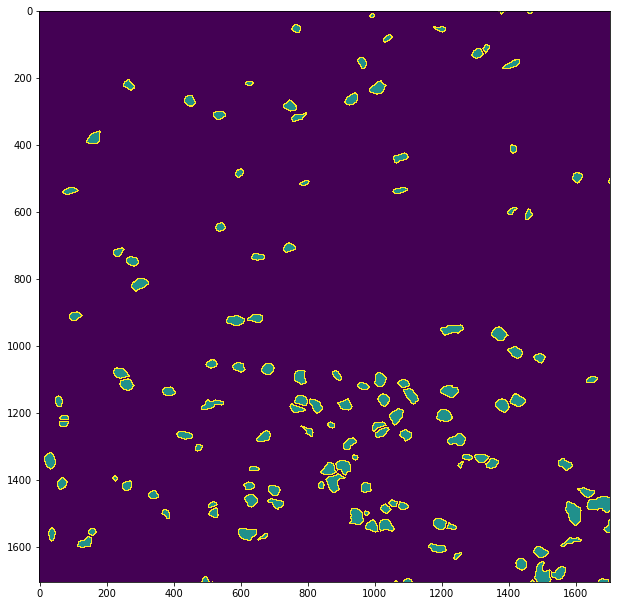

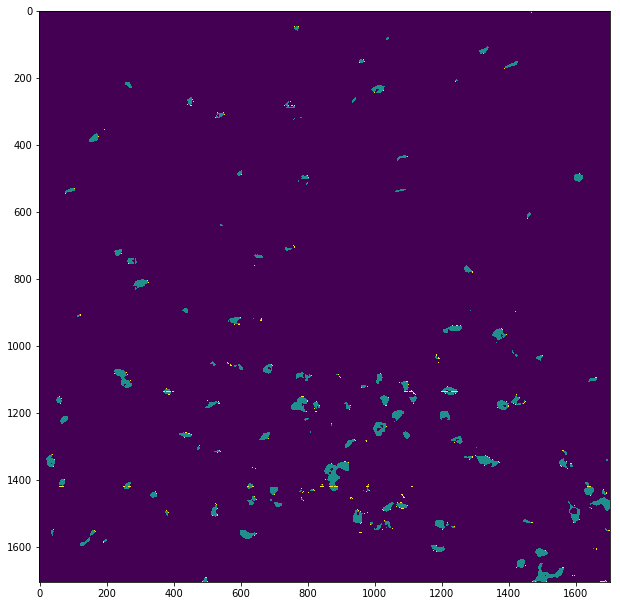

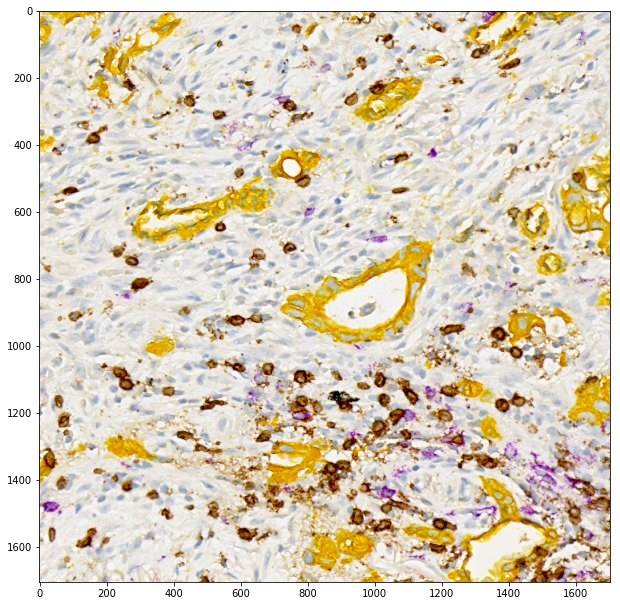

[['dice', 0.45698743906759404], ['Precision', 0.2949413324225918], ['Pc', 0.64488656195462479], ['Pc2', 0.068022378119172361]]


In [12]:
# Show results
from utility import precision
from scipy.ndimage.morphology import distance_transform_edt, binary_erosion

def Pc(Yor,Y_hator,tetha=5,c=1.0):
    Y = np.copy(Yor)
    Y_hat = np.copy(Y_hator)
    Y[Y!=c] = 0
    Y[Y==c] = 1.0
    Y_hat[Y_hat!=c] = 0
    Y_hat[Y_hat==c] = 1.0
    Bgt = Y - binary_erosion(Y,structure=np.ones((3,3)))
    fig = matplotlib.pyplot.gcf()
    Bps = Y_hat - binary_erosion(Y_hat,structure=np.ones((3,3)))
    D = distance_transform_edt(1-Bgt)
    D_Bpd = D[Bps==1.0]
    return np.sum(D_Bpd<tetha)/(float(np.sum(Bgt==1.0)) + 1)

X,Y,W = dataset.get_X_Y_W(index=7,train=True)
Y_hat,crops = predict_full_image(mimo,X)
cropsh,cropsw = crops

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5,forward=True)

Yimg = from_categorical(np.expand_dims(Y,0))[0]

plt.imshow(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
plt.show()


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5,forward=True)
plt.imshow(Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
plt.show()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5,forward=True)
plt.imshow(X[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]]*stds + means)
plt.show()

dice_s = dice(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
precision_s = precision(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
Pc_s = Pc(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]])
Pc_s2 = Pc(Yimg[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],Y_hat[cropsh[0]:cropsh[1],cropsw[0]:cropsw[1]],c=2.0)


table = [["dice",dice_s],
         ["Precision",precision_s],
         ["Pc",Pc_s],
         ["Pc2",Pc_s2]
        ]
print(table)